Author: Pietro Ariston Zubiri

Last Updated: 4/26/2025

## Project Background and Rationale

This data was scraped responsibly with Selenium from the official Glock website (https://eu.glock.com) on April 24, 2025. Only public data was accessed.
I chose to explore and analyse the active product range of Glock pistols for this exploaratory data analysis (EDA) project as I thought it would be interesting to apply data science methods to a domain I knew little about. Exploring unfamiliar industries is always a good way to sharpen up ones ability to ask questions and stay curious.  Special thanks to my friend Brandon for teaching me the basics of firearms to help kickstart this project.
I hope you find my work interesting.

## The Story of Glock

<p align="center">
<img src="./images/glock_art.jpg" alt="Gaston Glock and the G17 Prototype" width="800"/>
</p>

Gaston Glock was an Austrian engineer and businessman who founded Glock in 1963. Initially, the company specialized in manufacturing curtain rods and military equipment like knives and grenade casings. When Glock turned to firearms development in the early 1980s, he had no prior gunsmithing experience — but his background in industrial fabrication and materials engineering became a key advantage. Instead of relying on traditional, handcrafted methods, Glock emphasized the use of modern machinery, automation, and polymer technology. This approach reduced production costs, minimized human error, and created consistent, high-quality parts with tight tolerances. His first firearm, the Glock 17, was a lightweight, durable, and highly reliable semi-automatic pistol. It quickly won the Austrian Army’s contract in 1982 and soon became a global phenomenon. Today, Glock pistols are the most widely used handguns by law enforcement, military, and civilians around the world, valued for their rugged simplicity and unmatched reliability.

## Reputation of Glock

<p align="center">
<img src="./images/glock22_gen5.jpg" alt="Glock-22 Gen 5" width="800"/>
</p>
Glock pistols have built a reputation for being rugged, reliable, and highly functional. When gun owners think of a Glock, they often associate it with simplicity, toughness and practicality- a "no-frills" tool built to perform in any scenario. However, For many people unfamiliar with firearms, Glocks have gained a reputation as small, lightweight "plastic guns" with limited power and range. This perception stems largely from popular media, where Glocks are often portrayed as token weapons or standard-issue pistols that lack the stopping power of larger firearms. Movies and video games like Counter-Strike have reinforced this image by positioning Glocks as token or starter weapons. In this project, we will explore and analyze the range of Glock firearms and debunk facts from fiction through statistical methods and learn a thing or two about Glock pistols.

## Initial Exploration and Data Quality Assessment
If you aren't here for the technical bits, skip over this section.

In [75]:
# Initializing dependencies

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

current_dir = os.getcwd()
csv_path = os.path.join(current_dir, 'glock_dataset.csv')

In [48]:
# Importing data

data_raw = pd.read_csv(csv_path)
data = data_raw.copy()

data.head(3)

,name,description,url,Caliber,System,Mag. Capacity,Barrel Length,Trigger Pull***,Weight_without_magazine,Weight_with_empty_magazine,...,Dimension_LENGTH (OVERALL)*,Dimension_SLIDE LENGTH,Dimension_WIDTH (OVERALL),Dimension_SLIDE WIDTH,Dimension_HEIGHT INCL. MAG.,Dimension_,Dimension_Sight Radius POLYMER,Dimension_Sight Radius STEEL,Dimension_Sight Radius GNS,Dimension_TRIGGER DISTANCE*
0,G19,The G19 Gen5 is now available as an A-CUT™ COA...,https://eu.glock.com/en/products/pistols/g19-g...,9 mm Luger,Safe Action®,Standard: 15,102 mm | 4.02 inch,26 N,without magazine | 600 g | 21.16 oz incl. COA,with empty magazine | 680 g | 23.99 oz incl. COA,...,185 mm | 7.28 inch,174 mm | 6.85 inch,34 mm | 1.34 inch,"25,5 mm | 1.00 inch",128 mm | 5.04 inch,148 mm | 5.83 inch,NaN,146 mm | 5.75 inch,NaN,70 mm | 2.76 inch
1,G43X,The G43X is now available as an A-CUT™ COA™ Co...,https://eu.glock.com/en/products/pistols/g43x-...,9 mm Luger,Safe Action®,Standard: 10,87 mm | 3.43 inch,24 N,without magazine | 480 g | 16.93 oz incl. COA,with empty magazine | 545 g | 19.22 oz incl. COA,...,165 mm | 6.50 inch,154 mm | 6.06 inch,28 mm | 1.10 inch,22 mm | 0.87 inch,128 mm | 5.04 inch,148 mm | 5.83 inch,NaN,126 mm | 4.96 inch,NaN,67 mm | 2.64 inch
2,G45,The G45 is now available as an A-CUT™ COA™ Com...,https://eu.glock.com/en/products/pistols/g45-a...,9 mm Luger,Safe Action®,Standard: 17,102 mm | 4.02 inch,26 N,without magazine | 620 g | 21.87 oz incl. COA,with empty magazine | 700 g | 24.69 oz incl. COA,...,189 mm | 7.44 inch,174 mm | 6.85 inch,34 mm | 1.34 inch,"25,5 mm | 1.00 inch",139 mm | 5.47 inch,159 mm | 6.26 inch,NaN,146 mm | 5.75 inch,NaN,70 mm | 2.76 inch


A quick preview of the raw data in a tabular format, let's take a look at how many firearms there are and the list of column/attribute names to see what we're working with, lets also do a bit of clean up on those names.

In [49]:
print('Number of handguns in dataset:',(len(data)))
print(data.columns)

Number of handguns in dataset: 86
Index(['name', 'description', 'url', 'Caliber', 'System', 'Mag. Capacity',
       'Barrel Length', 'Trigger Pull***', 'Weight_without_magazine',
       'Weight_with_empty_magazine', 'Weight_with_loaded_magazine',
       'Dimension_LENGTH (OVERALL)*', 'Dimension_SLIDE LENGTH',
       'Dimension_WIDTH (OVERALL)', 'Dimension_SLIDE WIDTH',
       'Dimension_HEIGHT INCL. MAG.', 'Dimension_',
       'Dimension_Sight Radius POLYMER', 'Dimension_Sight Radius STEEL',
       'Dimension_Sight Radius GNS', 'Dimension_TRIGGER DISTANCE*'],
      dtype='object')


In [50]:
# Column name clean up
data.rename(columns={
    'Mag. Capacity': 'mag_size',
    'Barrel Length': 'barrel_length',
    'Trigger Pull***': 'trigger_pull',
    'Dimension_LENGTH (OVERALL)*' : 'gun_length', 
    'Dimension_SLIDE LENGTH' : 'slide_length',
    'Dimension_WIDTH (OVERALL)' : 'gun_width', 
    'Dimension_SLIDE WIDTH' : 'slide_width',
    'Dimension_HEIGHT INCL. MAG.' : 'height_incl_mag', 
    'Dimension_' : 'height_incl_mag_2', # manually verified this attribute to be height including mag
    'Dimension_Sight Radius POLYMER' : 'sight_radius_polymer', 
    'Dimension_Sight Radius STEEL' : 'sight_radius_steel',
    'Dimension_Sight Radius GNS' : 'sight_radius_gns', 
    'Dimension_TRIGGER DISTANCE*' : 'trigger_distance',
}, inplace=True)

data.columns = map(str.lower, data.columns)

(data.head(1))


,name,description,url,caliber,system,mag_size,barrel_length,trigger_pull,weight_without_magazine,weight_with_empty_magazine,...,gun_length,slide_length,gun_width,slide_width,height_incl_mag,height_incl_mag_2,sight_radius_polymer,sight_radius_steel,sight_radius_gns,trigger_distance
0,G19,The G19 Gen5 is now available as an A-CUT™ COA...,https://eu.glock.com/en/products/pistols/g19-g...,9 mm Luger,Safe Action®,Standard: 15,102 mm | 4.02 inch,26 N,without magazine | 600 g | 21.16 oz incl. COA,with empty magazine | 680 g | 23.99 oz incl. COA,...,185 mm | 7.28 inch,174 mm | 6.85 inch,34 mm | 1.34 inch,"25,5 mm | 1.00 inch",128 mm | 5.04 inch,148 mm | 5.83 inch,NaN,146 mm | 5.75 inch,NaN,70 mm | 2.76 inch


### Each row is a gun and every gun has the following attributes

name - gun name, guns can have the same name but have different variants based on generation or the accessories they come with.

variant - __to be added later__, guns can have variants being sold that include different features, accessories etc. (e.g. Glock-17, Glock-17C, Glock-17-T-MOS)

description - the guns description as per the glock product page

url - the url that the data was collected from

caliber - the ammunition which the gun chamber is designed to accommodate

system - the safety system of the gun

mag_size - number of bullets the magazine or clip can hold at once

barrel_length - length of the gun barrel, longer lengths generally improve accuracy over distance and higher muzzle velocities. (more power, less wind drift, )

trigger_pull - force required to pull the trigger

weight - three values for gun weight with no magazine, empty magazine or loaded magazine.

height_incl_mag & height_incl_mag_2 - height including magazine, some guns can be purchased with a different magazine hence the second value

sight_radius for steel/polymer/gns - sight radius indicates distance between front and rear sights, longer is better for accuracy over distance. glock offers sights in steel, polymer and night mode.

trigger_distance - distance needed for the trigger to fire the gun.


In [51]:
data.head(1)

,name,description,url,caliber,system,mag_size,barrel_length,trigger_pull,weight_without_magazine,weight_with_empty_magazine,...,gun_length,slide_length,gun_width,slide_width,height_incl_mag,height_incl_mag_2,sight_radius_polymer,sight_radius_steel,sight_radius_gns,trigger_distance
0,G19,The G19 Gen5 is now available as an A-CUT™ COA...,https://eu.glock.com/en/products/pistols/g19-g...,9 mm Luger,Safe Action®,Standard: 15,102 mm | 4.02 inch,26 N,without magazine | 600 g | 21.16 oz incl. COA,with empty magazine | 680 g | 23.99 oz incl. COA,...,185 mm | 7.28 inch,174 mm | 6.85 inch,34 mm | 1.34 inch,"25,5 mm | 1.00 inch",128 mm | 5.04 inch,148 mm | 5.83 inch,NaN,146 mm | 5.75 inch,NaN,70 mm | 2.76 inch


In [52]:
exclude = ['description','url']
columns = [col for col in data.columns if  col not in exclude]

for col in columns:
    print(data[col].head(1))

0    G19
Name: name, dtype: object
0    9 mm Luger
Name: caliber, dtype: object
0    Safe Action®
Name: system, dtype: object
0    Standard: 15
Name: mag_size, dtype: object
0    102 mm | 4.02 inch
Name: barrel_length, dtype: object
0    26 N
Name: trigger_pull, dtype: object
0    without magazine | 600 g | 21.16 oz incl. COA
Name: weight_without_magazine, dtype: object
0    with empty magazine | 680 g | 23.99 oz incl. COA
Name: weight_with_empty_magazine, dtype: object
0    with loaded magazine** | 865 g | 30.51 oz incl...
Name: weight_with_loaded_magazine, dtype: object
0    185 mm | 7.28 inch
Name: gun_length, dtype: object
0    174 mm | 6.85 inch
Name: slide_length, dtype: object
0    34 mm | 1.34 inch
Name: gun_width, dtype: object
0    25,5 mm | 1.00 inch
Name: slide_width, dtype: object
0    128 mm | 5.04 inch
Name: height_incl_mag, dtype: object
0    148 mm | 5.83 inch
Name: height_incl_mag_2, dtype: object
0    NaN
Name: sight_radius_polymer, dtype: object
0    146 mm | 5.75 i

In [ ]:
columns_to_clean = {
    'barrel_length': 'barrel_length_mm',
    'trigger_pull': 'trigger_pull_N',
    'gun_length': 'gun_length_mm',
    'slide_length': 'slide_length_mm',
    'gun_width': 'gun_width_mm',
    'slide_width': 'slide_width_mm',
    'height_incl_mag': 'height_incl_mag_mm',
    'height_incl_mag_2': 'height_incl_mag_2_mm',
    'sight_radius_polymer': 'sight_radius_polymer_mm',
    'sight_radius_steel': 'sight_radius_steel_mm',
    'sight_radius_gns': 'sight_radius_gns_mm',
    'weight_without_magazine': 'weight_without_magazine_g',
    'weight_with_empty_magazine': 'weight_with_empty_magazine_g',
    'weight_with_loaded_magazine': 'weight_with_loaded_magazine_g',
    'trigger_distance': 'trigger_distance_mm'
}

# Process each column
for old_col, new_col in columns_to_clean.items():
    if old_col in data.columns:
        data[new_col] = data[old_col].str.extract(r'(\d+)').astype(float)
        data.drop(columns=[old_col], inplace=True)

# Process mag sizes
data['mag_size_standard'] = data['mag_size'].str.extract(r'Standard:\s*(\d+)').astype(float).astype(float)
data['mag_size_optional'] = data['mag_size'].str.extract(r'Optional:\s*(\d+)').astype(float).astype(float)
data.drop(columns=['mag_size'], inplace=True)

# Step 1: Create the 'variant' column
data['variant'] = data['url'].str.extract(r'pistols/[^-]+-(.*)')

# Step 2: Extract 'gen' from 'variant'
data['gen'] = data['variant'].str.extract(r'(gen\d)')

# Step 3: Remove 'gen' from 'variant' if present
# This replaces things like 'gen5-' at the beginning OR anywhere (with or without dash)
data['variant'] = data['variant'].str.replace(r'gen\d-?', '', regex=True)


cols = list(data.columns)
# Ensure 'variant' is right after 'name'
cols.insert(cols.index('name') + 1, cols.pop(cols.index('variant')))
# Move 'gen' right after 'variant'
cols.insert(cols.index('variant') + 1, cols.pop(cols.index('gen')))
data = data[cols]



data.head(5)


,name,variant,gen,description,url,caliber,system,barrel_length_mm,trigger_pull_N,gun_length_mm,...,height_incl_mag_2_mm,sight_radius_polymer_mm,sight_radius_steel_mm,sight_radius_gns_mm,weight_without_magazine_g,weight_with_empty_magazine_g,weight_with_loaded_magazine_g,trigger_distance_mm,mag_size_standard,mag_size_optional
0,G19,a-cut-coa-combo,gen5,The G19 Gen5 is now available as an A-CUT™ COA...,https://eu.glock.com/en/products/pistols/g19-g...,9 mm Luger,Safe Action®,102.0,26.0,185.0,...,148.0,NaN,146.0,NaN,600.0,680.0,865.0,70.0,15.0,NaN
1,G43X,a-cut-coa-combo,NaN,The G43X is now available as an A-CUT™ COA™ Co...,https://eu.glock.com/en/products/pistols/g43x-...,9 mm Luger,Safe Action®,87.0,24.0,165.0,...,148.0,NaN,126.0,NaN,480.0,545.0,670.0,67.0,10.0,NaN
2,G45,a-cut-coa-combo,NaN,The G45 is now available as an A-CUT™ COA™ Com...,https://eu.glock.com/en/products/pistols/g45-a...,9 mm Luger,Safe Action®,102.0,26.0,189.0,...,159.0,NaN,146.0,NaN,620.0,700.0,910.0,70.0,17.0,NaN
3,G47,a-cut-coa-combo,NaN,The G47 is now available as an A-CUT™ COA™ Com...,https://eu.glock.com/en/products/pistols/g47-a...,9 mm Luger,Safe Action®,114.0,26.0,202.0,...,159.0,NaN,158.0,NaN,640.0,720.0,930.0,70.0,17.0,NaN
4,G48,a-cut-coa-combo,NaN,The G48 is now available as an A-CUT™ COA™ Com...,https://eu.glock.com/en/products/pistols/g48-a...,9 mm Luger,Safe Action®,106.0,24.0,185.0,...,148.0,NaN,146.0,NaN,540.0,605.0,730.0,67.0,10.0,NaN


In [54]:
categories = ['name', 'caliber', 'system', 'variant', 'gen']

for category in categories:
    print('')
    print(category)
    print(data[category].unique())
    print('number of values: ',len(data[category].unique()))
    print('')



name
['G19' 'G43X' 'G45' 'G47' 'G48' 'G17' 'G17L' 'G18' 'G18C' 'G19X' 'G26'
 'G34' 'G43' 'G17P' 'G19P' 'G45P' 'G44' 'G22' 'G23' 'G24' 'G27' 'G35'
 'G22P' 'G23P' 'G20' 'G29' 'G21' 'G30' 'G25' 'G42' 'G17T' 'G19T' 'G45T']
number of values:  33


caliber
['9 mm Luger' '22 l.r.' '40 S&W' '10 mm Auto' '45 Auto' '380 Auto'
 'Training ammunition']
number of values:  7


system
['Safe Action®' 'Safe Action®\nSemi-/Full-automatic firing mode']
number of values:  2


variant
['a-cut-coa-combo' nan '' 'mos' 'l' 'c' 'gns' 'rail' 'mos-hunter-edition'
 'silver-slide' 'cut' 'p' 't-fx-fof' 't-mos-fx-fof' 't-mos-utm' 't-utm']
number of values:  16


gen
['gen5' nan 'gen4']
number of values:  3



Categories seem good sensible, change the names of the guns to reflect the base models, differences should be in the 'variant' column which I will add as well.

Additionally, there is an empty value '' in variant, which means some Glocks don't have a variant, we'll replace these empty values with "base" indicating they're the standard version of the Glock.

In [55]:
# Adding a column to set guns with no variant to say base (base model)
data['variant'] = data['variant'].replace('', 'base').fillna('base')
data['variant'].unique()

# Modifying original names so they have the same base models (ie G17 and G17L both are glock 17s)
data['name'] = data['name'].str[:3]

In [56]:
# Looking into what glock models have Semi / Full auto mode
data[data['system']=='Safe Action®\nSemi-/Full-automatic firing mode']

,name,variant,gen,description,url,caliber,system,barrel_length_mm,trigger_pull_N,gun_length_mm,...,height_incl_mag_2_mm,sight_radius_polymer_mm,sight_radius_steel_mm,sight_radius_gns_mm,weight_without_magazine_g,weight_with_empty_magazine_g,weight_with_loaded_magazine_g,trigger_distance_mm,mag_size_standard,mag_size_optional
12,G18,base,NaN,As a true fully automatic pistol the G18 is on...,https://eu.glock.com/en/products/pistols/g18,9 mm Luger,Safe Action®\nSemi-/Full-automatic firing mode,114.0,25.0,204.0,...,NaN,165.0,164.0,163.0,625.0,705.0,940.0,72.0,19.0,17.0
13,G18,c,NaN,The GLOCK G18C comes with compensator slots in...,https://eu.glock.com/en/products/pistols/g18-c,9 mm Luger,Safe Action®\nSemi-/Full-automatic firing mode,114.0,25.0,204.0,...,NaN,165.0,164.0,163.0,590.0,670.0,905.0,72.0,19.0,17.0


So everything else but the Glock 18 is semi-automatic.

After looking into the URLs and watching some <a href="https://www.youtube.com/shorts/ku9iIYZmki8">demo videos</a>, 

The Glock 18 is actually a machine pistol- a FULLY AUTOMATIC pistol. Very cool

It seems that this can only be purchased by law enforcement and militaries- reasonable.

In [62]:
# Lastly, let's do some quick checks to see if there are anymore null values, duplicate values- or just attributes that need to be modified
data.head(1)

,name,variant,gen,description,url,caliber,system,barrel_length_mm,trigger_pull_N,gun_length_mm,...,height_incl_mag_2_mm,sight_radius_polymer_mm,sight_radius_steel_mm,sight_radius_gns_mm,weight_without_magazine_g,weight_with_empty_magazine_g,weight_with_loaded_magazine_g,trigger_distance_mm,mag_size_standard,mag_size_optional
0,G19,a-cut-coa-combo,gen5,The G19 Gen5 is now available as an A-CUT™ COA...,https://eu.glock.com/en/products/pistols/g19-g...,9 mm Luger,Safe Action®,102.0,26.0,185.0,...,148.0,NaN,146.0,NaN,600.0,680.0,865.0,70.0,15.0,NaN


In [ ]:
print(('Number of duplicates:'),data.duplicated().sum())
print("")
print(data.dtypes)


Number of duplicates 0

name                              object
variant                           object
gen                               object
description                       object
url                               object
caliber                           object
system                            object
barrel_length_mm                 float64
trigger_pull_N                   float64
gun_length_mm                    float64
slide_length_mm                  float64
gun_width_mm                     float64
slide_width_mm                   float64
height_incl_mag_mm               float64
height_incl_mag_2_mm             float64
sight_radius_polymer_mm          float64
sight_radius_steel_mm            float64
sight_radius_gns_mm              float64
weight_without_magazine_g        float64
weight_with_empty_magazine_g     float64
weight_with_loaded_magazine_g    float64
trigger_distance_mm              float64
mag_size_standard                float64
mag_size_optional                

No duplicates, and after going through each attribute, the data types seem to be in order, cleaning and transforming done- we will move more into exploration

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '9 mm Luger'),
  Text(1, 0, '22 l.r.'),
  Text(2, 0, '40 S&W'),
  Text(3, 0, '10 mm Auto'),
  Text(4, 0, '45 Auto'),
  Text(5, 0, '380 Auto'),
  Text(6, 0, 'Training ammunition')])

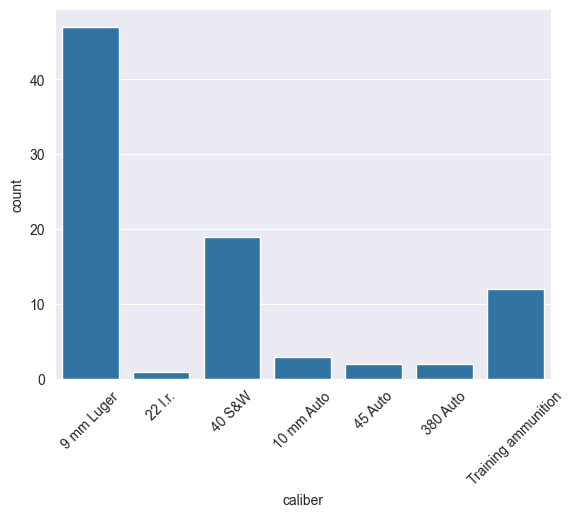

In [76]:
sns.set_style('darkgrid')

sns.countplot(x='caliber', data=data
              )
plt.xticks(rotation=45)


9mm Luger

Despite being portrayed as weak in pop culture, 9mm is highly effective in real-world use due to its low recoil, high magazine capacity, and strong stopping power with modern ammunition. These traits make it ideal for military, law enforcement, and self-defense, which explains why the majority of Glock pistols in the dataset are chambered in 9mm. Glock’s original Glock 17 helped popularize the caliber, and with NATO standardization and advances in bullet design, most agencies now favor 9mm over heavier rounds.


.40 S&W

Originally designed for law enforcement in response to concerns about 9mm’s stopping power, .40 S&W delivers more energy and penetration, but with heavier recoil and lower capacity. It became widely used in the '90s but has since declined as 9mm ammo improved over time. The chart reflects this shift—Glock produces far fewer .40-caliber models today, aligning with a broader industry move back to 9mm for its balance for performance and efficiency.

Training Ammunition

Certain glocks are training models and are designed to be used with special training ammunition. Typically including plastic, rubber, paint, low-velocity rounds.

<p align="center">
<img src="./images/bullet-comparison.png" alt="Comparison of 9mm and 40 S&W" height="400"/>
<img src="./images/training-ammo.jpg" alt="Training Ammo" height="400"/>
</p>







In [107]:
print("Heaviest Glock")
print(data.sort_values(by='weight_without_magazine_g', ascending=False)[['name','variant', 'weight_without_magazine_g', 'caliber']].head(1))

print("")

print("Lightest Glock")
print(data.sort_values(by='weight_without_magazine_g', ascending=False)[['name','variant', 'weight_without_magazine_g', 'caliber']].tail(1))
print("\nProduct Description: ",data.iloc[73]['description'])


Heaviest Glock
   name variant  weight_without_magazine_g caliber
56  G24    base                      760.0  40 S&W

Lightest Glock
   name variant  weight_without_magazine_g   caliber
73  G42    base                      345.0  380 Auto

Product Description:  For those discerning shooters who desired the smallest GLOCK possible, the company responded with the now popular G42 in 380 AUTO with ultra-compact dimensions and easy-to-shoot characteristics. The G42 packs all the features GLOCK customers have come to appreciate - from the GLOCK Safe Action System with its multiple integrated safety features to the brand’s proven reliability and durability.


<div align="center">
  <b>GLOCK 24 – .40 S&W Long Slide</b><br>
  Product Description: <i>The long slide and barrel design combined with the 40 S&W caliber cartridge make this GLOCK a great choice for a multitude of shooting activities.</i><br><br>
  In other words, this is a very powerful
  <img src="./images/glock24.jpg" alt="Comparison of 9mm and 40 S&W" height="400"/>
</div>

<br>

<div align="center">
  <b>GLOCK 42 – .380 AUTO Subcompact</b><br>
  Product Description: <i>For those discerning shooters who desired the smallest GLOCK possible, the company responded with the now popular G42 in 380 AUTO with ultra-compact dimensions and easy-to-shoot characteristics.</i><br><br>
  <img src="./images/glock42.jpg" alt="Training Ammo" height="400"/>
</div>

